# Team 5:

### Xiaoyue Wang, Yogita Sharma, Sijia Huang, Lei Cao

Link of Shared Drive: https://drive.google.com/drive/folders/1J6dlwyh5lA1-BbbGUNPOWLzLZDY48JGQ?usp=sharing

# Project Introduction 

People worldwide are increasingly adopting the use of face masks to slow the spread of COVID-19, and the latest science may convince even more to do so. There is evidence that US states mandating the use of face masks in public had a greater decline in daily COVID-19 growth rates after issuing these mandates compared with states that did not issue mandates[1]. These effects were observed conditional on other existing social distancing measures and were independent of the CDC recommendation to wear face covers issued April 3, 2020. As international and state governments begin to relax social distancing restrictions, and considering the high likelihood of a second COVID-19 wave in the fall and winter of 2020,30 requiring the use of face masks in public could help in reducing COVID-19 spread[2].

“We are not defenseless against COVID-19,” said CDC Director Dr. Robert R. Redfield. “Cloth face coverings are one of the most powerful weapons we have to slow and stop the spread of the virus – particularly when used universally within a community setting[3]. All Americans have a responsibility to protect themselves, their families, and their communities”[4]. However, the manner people wear masks is very important in preventing covid-19[5]. Wearing mask in an improper way will even do harm to our body[6,7].Hence, CDC has put forward the correct way and some tips to help people wear mask properly[8].

To contribute to the reduction of COVID-19, masks are our best tool as a society[9]. To serve the public health goal of ensuring proper mask wearing in public space, in this project we build a binary classification model to identify whether or not an individual is wearing a mask in a proper way. 

This face mask recognition system can be used in crowded places such as hospitals and malls at the entrance which only allows people to enter if they are wearing a mask properly. We have trained our model for people wearing masks improperly(based on WHO guidelines[10]), say if their nose, mouth and chin are fully covered or not, also for typical face masks where the masks have certain images on them which might confuse the recognition system. We hope this system can better help people recognize their condition and remind them to wear mask in a proper manner.




1. https://jamanetwork.com/journals/jama/fullarticle/2769440

2. https://www.healthaffairs.org/doi/full/10.1377/hlthaff.2020.00818

3. https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/diy-cloth-face-coverings.html

4. https://www.cdc.gov/media/releases/2020/p0714-americans-to-wear-masks.html

5. https://www.mayoclinic.org/diseases-conditions/coronavirus/in-depth/coronavirus-mask/art-20485449

6. https://www.umms.org/coronavirus/what-to-know/masks/wearing-mask

7. https://www.hackensackmeridianhealth.org/HealthU/2020/07/10/5-mask-mistakes-people-make/

8. https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/how-to-wear-cloth-face-coverings.html

9. https://www.nationalgeographic.com/science/2020/09/face-mask-recognition-has-arrived-for-coronavirus-better-or-worse-cvd/

10. https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public/when-and-how-to-use-masks

11. https://www.pewresearch.org/fact-tank/2020/06/23/most-americans-say-they-regularly-wore-a-mask-in-stores-in-the-past-month-fewer-see-others-doing-it/

# Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Gathering--scraping images from google (2004 pics in total)

**Note: Don't re-run this part unless necessary**

## Steps:

- scraped 3900 images (1950 for wearing a mask, 1950 for not wearing a mask) from google search, using 26 different key words.
- filtered out cartoons and repetitive images.
- deleted images that are smaller than 128 * 128 to avoid images that are too blurred to offer any useful information.

`After the aforementioned steps, we downsized the number of images to 2004 (1129 for wearing a mask, 875 for not wearing a mask). The proportion of the with mask images in all the images is around 56%, which approximates to the proportion of population regularly wearing a mask in the U.S. according to the survey results in June. (see https://www.pewresearch.org/fact-tank/2020/06/23/most-americans-say-they-regularly-wore-a-mask-in-stores-in-the-past-month-fewer-see-others-doing-it/ for further detail). `

`Meanwhile, to simulate the reality, we also diversified the sub-types of both wearing and not wearing a mask`


## The final dataset includes the following categories:

* ### Wearing a mask (1129 pics)
    - Wearing a mask with a human face printed on it
    - Wearing a mask of other styles

* ### Not wearing a mask (875 pics)
    - Not wearing anything 
    - Not wearing a mask in an appropriate way 
        - Wearing a mask but not properly covering the nose and mouth (for further detail, see https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/about-face-coverings.html), including: 
               - Around one’s neck
               - On one’s forehead
               - Under one’s nose
               - Only on one's nose
               - On one’s chin
               - Dagling from one’s ear
               - On one's arm
        - Covering the face with something else, such as scarf, hijab, towel, etc. 
        - Covering the face with shaving cream, painting, tattoo, makeup, or something equivalent as disguise. 


## Preparation for image scraping

1.   install and import useful modules
2.   starting the webdriver


In [ ]:
! pip install selenium

     |████████████████████████████████| 911kB 2.8MB/s 


In [ ]:
! pip install pillow

In [ ]:
import selenium
from selenium import webdriver

In [ ]:
# starting a webdriver

!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
! pip install requests

In [ ]:
import io
import requests
from PIL import Image
import hashlib
import os
import time

## Scraping 1950 pics for 'wearing masks' from google search  -- we'll use these 1950 pics as a base, from which 500 relevant are finally selected.


### Scraping 150 pics using the keyword 'wearing mask'

In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?hl=EN&tbm=isch&source=hp&biw=1280&bih=578&ei=h1iOX-OTIJ-sytMPpYW5aA&q=wearing+mask&oq=wearing+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADIFCAAQsQMyAggAMgIIADICCABQn5wKWOqpCmC7rApoAHAAeACAAUSIAc0FkgECMTKYAQCgAQGqAQtnd3Mtd2l6LWltZw&sclient=img&ved=0ahUKEwij8-eynMLsAhUflnIEHaVCDg0Q4dUDCAc&uact=5"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


In [ ]:
# apply the function
search_and_download(search_term='wearing mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRpjIPyN0xNjdVqRoriPGsFIAkhsv-Vjdg_Yg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wearing_mask/3d5eacb4f0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRHZNnYJdhcDF8FOjNoJ6yyeuc8nTXu73lWaw&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wearing_mask/5e52023924.jpg
SUCCESS - saved https://intermountainhealthcare.org/-/media/images/modules/blog/posts/2020/08/mom-and-son-wearing-a-mask.jpg?mw=1600 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wearing_mask/79d1cda864.jpg
SUCCESS - saved https://healthjournalism.org/blog/wp-content/uploads/2020/04/facemask-instructions-01-300x300.png - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wearing_mask/32604108e1.jpg
SUCC

### Scraping 150 pics using the keyword 'wears mask'

In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=wears+mask&rlz=1C1CHBF_zh-TWUS881US883&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiSg_2Co8LsAhXYmHIEHVNSCSAQ_AUoAXoECBUQAw&biw=1280&bih=578"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='wears mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTiFHfYlMYzFsfdAEIrR0nRLs-FHBxpnzka-w&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wears_mask/8aa8d0042e.jpg
SUCCESS - saved https://www.sportsnet.ca/wp-content/uploads/2020/09/Naomi-Osaka-1040x572.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wears_mask/a8e9356e15.jpg
SUCCESS - saved https://cbsnews1.cbsistatic.com/hub/i/r/2020/07/11/7e2a98b4-3fff-4277-b37b-80069374e0d5/thumbnail/1200x630/66b0b3676ec747beab4980359fe77912/gettyimages-1226305358.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wears_mask/ab4b77ff28.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTjMeXngJY1A38y_rR_b6FwzLMHiSe-EOX9Bw&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wears_mas

### Scraping 150 pics using the keyword 'people mask'

In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=people+mask&tbm=isch&ved=2ahUKEwiJks6Eo8LsAhXFA98KHfO9DBIQ2-cCegQIABAA&oq=people+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BwgAELEDEEM6BQgAELEDOgYIABAHEB46BAgAEENQ5bYqWOnIKmCWyipoAHAAeACAAWeIAe0FkgEEMTAuMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=fV-OX8nfKcWH_Abz-7KQAQ&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='people mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRaoc6HtArroDpxZbaaqBM__4RoA5oIqOmyGg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/efd1b1379e.jpg
SUCCESS - saved https://s.abcnews.com/images/Health/WireAP_2656b0963ca74dba85bcf89b5e29dd68_16x9_1600.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/ffaeff55a1.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTHOCQ1QmoAd-h54l6YDxx28qPQ8QzL277Eaw&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/f2470ec8fa.jpg
SUCCESS - saved https://media2.s-nbcnews.com/i/newscms/2020_29/3397328/200715-california-coronavirus-del-mar-masks-ac-641p_96c4b8dd5c37702051c958e8089e7f94.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/5eda

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


SUCCESS - saved https://www.adl.org/sites/default/files/styles/max_650x650/public/2020-05/Coronavirus-people-in-white-medical-face-mask-illustration-iStock-1202707966.png?itok=sb03V1rM - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/44261b6d33.jpg
SUCCESS - saved https://e3.365dm.com/20/06/2048x1152/skynews-coronavirus-uk-shop-queue_5006330.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/02d80f9e68.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQkXRZc5hV1_3SaY1wFQMCqBnGx6fiBMbCBOQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/07fa602c58.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQF_EF49FkaZELa7r6INoXIdbr-nIcmd2xD_w&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_mask/64ae6f2682.jpg
SUCCESS - saved https://www.ft.com/__origami/service/ima

### Scraping 150 pics using the keyword 'man wearing mask'

In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=man+wearing+mask&tbm=isch&ved=2ahUKEwjZ7OCEp8LsAhVWZ98KHdmZCDQQ2-cCegQIABAA&oq=man+wearing+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BggAEAcQHlDrRVjFT2CzUWgAcAB4AIABSIgBgQSSAQE4mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=r2OOX5nZLNbO_QbZs6KgAw&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='man wearing mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://npr.brightspotcdn.com/dims4/default/b8df61c/2147483647/strip/true/crop/563x375+0+0/resize/880x586!/quality/90/?url=http%3A%2F%2Fnpr-brightspot.s3.amazonaws.com%2F22%2F98%2F59aaf11e489993440196b6b2f667%2Fphoto-by-tais-captures-on-unsplash.jfif - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_wearing_mask/d817b3e2fd.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQQbPiJPnOlhjGlcUwKcrghE5uDft_Sc858pw&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_wearing_mask/91ebc6de97.jpg
SUCCESS - saved https://d1hfln2sfez66z.cloudfront.net/04-14-2020/t_585acff789b94bbda5cf6b0b0ef1a616_name_A2DA9DDDB8AA49EE80708176B4635C26.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_wearing_mask/a582de9acf.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/imag

### Scraping 150 pics using the keyword 'woman mask'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=woman+mask&tbm=isch&ved=2ahUKEwj7xIXGqMLsAhUHjuAKHfwbBRAQ2-cCegQIABAA&oq=woman+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BggAEAcQHlCbhwJYz5ICYIWVAmgBcAB4AIABUIgB-AKSAQE2mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=RWWOX7uOBYecggf8t5SAAQ&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='woman mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://i2.wp.com/www.eatthis.com/wp-content/uploads/2020/08/woman-valve-face-mask.jpg?fit=1200%2C902&ssl=1 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask/25648d24f8.jpg
SUCCESS - saved https://mediaserver.responsesource.com/press-release/tb_lrg/131460/2Guard+mask.png - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask/49f26cbb26.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSTjQQEkToVlXUeFMDmJc7W-GG5gYtcNPABJQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask/fdaf8e9462.jpg
SUCCESS - saved https://i.insider.com/5eb4862b5f726e207f0b72d9?width=1100&format=jpeg&auto=webp - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask/db05dcb00c.jpg
SUCCESS - saved https://www.nydailynews.com/resizer/hpcFiT

### Scraping 150 pics using the keyword 'kid wearing mask'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=kid+wearing+mask&tbm=isch&ved=2ahUKEwjB-PbHqcLsAhUJMd8KHYyeDF0Q2-cCegQIABAA&oq=kid+wearing+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BggAEAcQHlDqNljnQmCiSGgAcAB4AIABe4gBqgaSAQM0LjSYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=VWaOX4H6HIni_AaMvbLoBQ&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='kid wearing mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQHHGv2N2_kLygQoHB3oFepOwjETDkvhRPHEg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/kid_wearing_mask/ffb05d13aa.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQoLgnogb3tE8BYnvuEck7cGGH7sEKL_s41Wg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/kid_wearing_mask/dd216d4a5e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-QOKfTepVbYZoF85kqj3D5jWbH0E5y0DXFQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/kid_wearing_mask/a5fe480169.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSFecN9EZZoYtb49AwJd_OvEbwP-nXFmqB5pA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/kid_wearing_mask/ed0fc66f40.jpg

### Scraping 150 pics using the keyword 'face wearing n95'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: face wearing n95
    search_url = "https://www.google.com/search?q=face+wearing+n95&tbm=isch&ved=2ahUKEwjD2uv-2cPsAhXIZd8KHUB1CkoQ2-cCegQIABAA&oq=face+wearing+n95&gs_lcp=CgNpbWcQA1CW5wVYtf0FYJiBBmgBcAB4AIABR4gBtAGSAQEzmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=VR-PX4PcEMjL_QbA6qnQBA&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='face wearing n95')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://imengine.prod.srp.navigacloud.com/?uuid=81F279BA-E970-4F76-9792-00F5AF061E9D&type=primary&q=72&width=1024 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_wearing_n95/c5a62d821b.jpg
SUCCESS - saved https://cdn.vox-cdn.com/thumbor/NRdEdI0CyaWalOZmXEKVnmAUxP4=/0x0:1024x598/1200x800/filters:focal(431x218:593x380)/cdn.vox-cdn.com/uploads/chorus_image/image/66828535/GettyImages_1213009968.0.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_wearing_n95/fb1c280292.jpg
SUCCESS - saved https://nortonhealthcare.com/wp-content/uploads/how_to_wear_a_face_mask.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_wearing_n95/867bf6eed1.jpg
SUCCESS - saved https://media.wusa9.com/assets/CCT/images/bb34bb81-f917-45a5-83dd-443e827c877f/bb34bb81-f917-45a5-83dd-443e827c877f_1920x1080.jpg - a

### Scraping 150 pics using the keyword 'person wearing medical mask'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: person wearing medical mask
    search_url = "https://www.google.com/search?q=person+wearing+medical+mask&tbm=isch&ved=2ahUKEwje4rWA3sPsAhXJG98KHaT9CUcQ2-cCegQIABAA&oq=person+wearing+medical+mask&gs_lcp=CgNpbWcQAzICCAAyBggAEAUQHjoGCAAQBxAeOggIABAHEAUQHlDvZlimbmC2cWgAcAB4AIABR4gB_wGSAQE0mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=iiOPX971E8m3_Aak-6e4BA&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='person wearing medical mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://s.abcnews.com/images/Health/rizzo-abc-er-200730_1596130225477_hpEmbed_16x9_992.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/person_wearing_medical_mask/90c6d86ceb.jpg
SUCCESS - saved https://assets0.dostuffmedia.com/uploads/aws_asset/aws_asset/5642232/0a519799-6591-43fe-9f75-f938468cacee.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/person_wearing_medical_mask/a8e75f6200.jpg
SUCCESS - saved https://image.shutterstock.com/image-photo/portrait-young-woman-wearing-medical-260nw-1694126794.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/person_wearing_medical_mask/4817ca808b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQZxFpe12PVzoU77dsANGOS_3Wnvdpqg2zU6g&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/pe

### Scraping 150 pics using the keyword 'person wearing surgical mask'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: person wearing surgical mask
    search_url = "https://www.google.com/search?q=person+wearing+surgical+mask&tbm=isch&ved=2ahUKEwjvrPKH3sPsAhXNHN8KHRO9AaUQ2-cCegQIABAA&oq=person+wearing+surgical+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADIGCAAQBRAeMgYIABAIEB4yBggAEAgQHjIGCAAQCBAeUPmvCVicxAlg5MsJaABwAHgAgAGRAYgBzwSSAQM4LjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=mSOPX6_8PM25_AaT-oaoCg&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='person wearing surgical mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRzaCEhjg4lYMu-_fD3Sgu8Qbek43zjo2WgoA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/person_wearing_surgical_mask/06576d0fd3.jpg
SUCCESS - saved https://media.allure.com/photos/5e34ab188a385400093f2a16/4:3/w_2663,h_1997,c_limit/mask.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/person_wearing_surgical_mask/232d9b3ef5.jpg
SUCCESS - saved https://media2.s-nbcnews.com/i/newscms/2020_17/1562134/face-mask-today-main1-200423_1d8b8691c3d3dc79e01bfa3144d50ce1.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/person_wearing_surgical_mask/742153b023.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQZxFpe12PVzoU77dsANGOS_3Wnvdpqg2zU6g&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #

### Scraping 150 pics using the keyword 'doctor wearing masks'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: doctor wearing masks
    search_url = "https://www.google.com/search?q=doctor+wearing+masks&tbm=isch&ved=2ahUKEwjo4sea38PsAhUMhuAKHV-rAv8Q2-cCegQIABAA&oq=doctor+wearing+ma&gs_lcp=CgNpbWcQARgBMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADoHCAAQsQMQQzoECAAQQzoFCAAQsQM6BggAEAUQHjoGCAAQCBAeULZNWLVkYJZ2aAFwAHgAgAE-iAG_BZIBAjEymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=zSSPX6jII4yMggff1or4Dw&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='doctor wearing masks')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQJaAbq4Cvzkdp_Cpc4MRgeKaPicnrziE9dkQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/doctor_wearing_masks/30efeb05b7.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSegIUB30iavrTr0wc4LXFGLyiilg-EIiNYRw&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/doctor_wearing_masks/1b9331d96e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRL6KKYFndIWcjms_BwqvnjffSUPqCqPPmrxw&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/doctor_wearing_masks/747520c1c2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTEiMD3swImowa5ffIoLR7qVcgvAaghgDs4kA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/doctor_wearing_mask

### Scraping 150 pics using the keyword 'maid wearing mask'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: maid wearing mask
    search_url = "https://www.google.com/search?q=maid+wearing+mask&tbm=isch&ved=2ahUKEwjJ3rX74MPsAhVGD98KHc6TAcEQ2-cCegQIABAA&oq=maid+wearing+mask&gs_lcp=CgNpbWcQAzoECAAQQzoFCAAQsQM6AggAOgcIABCxAxBDOgQIABAeOgYIABAFEB46BggAEAgQHlDKywRY1YYFYJCJBWgEcAB4AIABQ4gB6gmSAQIyMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=pSaPX4n4CMae_AbOp4aIDA&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='maid wearing mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://media.istockphoto.com/photos/maid-wearing-a-protective-mask-while-cleaning-living-room-under-picture-id1218045047 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/maid_wearing_mask/1e123eb564.jpg
SUCCESS - saved https://www.todayonline.com/sites/default/files/styles/new_app_article_detail/public/photos/43_images/20200604_police_pakistan_reuters.jpg?itok=IzbrSyqW - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/maid_wearing_mask/502bcccb5f.jpg
SUCCESS - saved https://media.istockphoto.com/photos/maid-wearing-a-facemask-to-avoid-the-spread-of-coronavirus-while-at-picture-id1224667642?k=6&m=1224667642&s=170667a&w=0&h=RapD6d5m9xD-wQo7Dm3jtoYjKuBjwNmcW0DJaNftMPY= - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/maid_wearing_mask/2f8f9f7bb1.jpg
SUCCESS - saved https://www.maidbrigade.com/blog/wp-

### Scraping 150 pics using the keyword 'worker wearing mask'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: worker wearing mask
    search_url = "https://www.google.com/search?q=worker+wearing+mask&tbm=isch&ved=2ahUKEwj10cmj4cPsAhXpT98KHVszA0sQ2-cCegQIABAA&oq=worker+wearing+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeOgYIABAHEB46CAgAEAcQBRAeUIcvWPo0YI03aABwAHgAgAE6iAHDApIBATaYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=-SaPX7XxFemf_Qbb5ozYBA&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='worker wearing mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR57sYf9bDDWyvEc0y__rA0FjTbU3v3neK68g&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/worker_wearing_mask/3efa4cb7ad.jpg
SUCCESS - saved https://cdn-res.keymedia.com/cms/images/us/036/0248_637165903408890770.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/worker_wearing_mask/0a43b13fd9.jpg
SUCCESS - saved https://www.ocregister.com/wp-content/uploads/2020/04/OCR-L-MASKS-0422-01-1.jpg?w=620 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/worker_wearing_mask/8856d7c2b5.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSzEKyITKqwDQaEEYwRAsN3LTNq30cC5cVBQQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/worker_wearing_mask/f2b6a8b872.jpg
SUCCESS - saved https://fcw.co

### Scraping 150 pics using the keyword 'dental wearing mask'

---



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: dental wearing mask
    search_url = "https://www.google.com/search?q=dental+wearing+mask&tbm=isch&ved=2ahUKEwiB39Tc38TsAhW4TTABHWY_DGUQ2-cCegQIABAA&oq=dental+wearing+mask&gs_lcp=CgNpbWcQAzIGCAAQBxAeOggIABAIEAcQHlDw3wFY1uQBYOrpAWgAcAB4AIABR4gB9wGSAQE0mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=j6uPX8HbObibwbkP5v6wqAY&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='dental wearing mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://www.the74million.org/wp-content/uploads/2020/08/DSC04179.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/dental_wearing_mask/9dd75731bb.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQmTjK23C4uNLSLnkp7X55zFAkpVfN67LTwiQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/dental_wearing_mask/31601d2c19.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRH2I76x7eEN_BfVmRaBbrMDGNGkSZQC9_IPA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/dental_wearing_mask/72c5db559e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSyhJHabQgC56kgo88_6xPF7mT6wikuBnfo8Q&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/dental_wearing_mask/e965490fd8.jpg
SUCCESS - saved http

## Scraping 1950 pics for 'not wearing mask'-- we'll use these 1950 pics as a base, from which 500 relevant are finally selected.

### Scraping 150 pics using the keyword 'not wearing mask'



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=not+wearing+mask&tbm=isch&ved=2ahUKEwjX5-bPqsLsAhXCAd8KHVqrAQgQ2-cCegQIABAA&oq=not+wearing+mask&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BggAEAcQHlCrRliUUGD4UWgAcAB4AIABQYgB6gOSAQE4mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=cmeOX9fmGcKD_Aba1oZA&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='not wearing mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQDb2v4eiLieU467oeqMt83whxTFQmEYGBkDQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/not_wearing_mask/cdcf0cde40.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTlAOxlQvd0TQU7So8xrJ-qcEXFwrknSK_5Kg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/not_wearing_mask/4ab6fea9a0.jpg
SUCCESS - saved https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F20%2F2020%2F04%2F24%2Fmask-wearing.jpg&q=85 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/not_wearing_mask/821af6268a.jpg
SUCCESS - saved https://i.insider.com/5e7e7139487c2227bf5b61e7?width=600&format=jpeg&auto=webp - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images

### Scraping 150 pics using the keyword 'wrong mask'



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=wrong+mask&tbm=isch&ved=2ahUKEwjcyMrFq8LsAhWJA98KHfgsDrcQ2-cCegQIABAA&oq=wrong+mask&gs_lcp=CgNpbWcQAzIECAAQQzICCAAyAggAMgIIADICCAAyAggAMgQIABBDMgQIABBDMgIIADoGCAAQBxAeOggIABAIEAcQHlCuNVjyOWCKPWgAcAB4AIABRogB2QOSAQE4mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=aWiOX5zwGYmH_Ab42bi4Cw&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='wrong mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRZ6F6gnmzNHSGELG_uTfsR89fn2aOJdqXCOQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wrong_mask/81a1d1a1c9.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRbsCrGXKWGspfxX85cbwp6_8rGJtfdSjR-tA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wrong_mask/4044fe7d3d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSBa1xqGTVQJxZsWnFJA53Rbx5QFnxDjieljA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wrong_mask/7ad3e841b7.jpg
SUCCESS - saved https://cdn.duvarenglish.com/uploads/2020/06/wrongmaskuse.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/wrong_mask/c652ac5ec8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn

### Scraping 150 pics using the keyword 'scarf as mask'



In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=scarf+as+mask&tbm=isch&ved=2ahUKEwjFjZeDrcLsAhVkazABHfIyC94Q2-cCegQIABAA&oq=scarf+as+mask&gs_lcp=CgNpbWcQAzICCAAyBggAEAcQHjIGCAAQBxAeMggIABAHEAUQHjIICAAQBxAFEB4yCAgAEAcQBRAeMggIABAHEAUQHjIICAAQBxAFEB4yCAgAEAcQBRAeMggIABAHEAUQHjoICAAQCBAHEB46BggAEAgQHlD7eFiwhAFg2YUBaABwAHgAgAFNiAHPBJIBATmYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=92mOX4W2AuTWwbkP8uWs8A0&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='scarf as mask')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://media.glamour.com/photos/5f037717797bf4926bdabfb6/master/w_621,h_799,c_limit/face%20masks%20.png - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/scarf_as_mask/afbf4fa865.jpg
SUCCESS - saved https://cdn.shopify.com/s/files/1/0030/5597/6537/articles/Olivia_Palermo_11_copy_1250x.JPG?v=1595455866 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/scarf_as_mask/f14947fe87.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRKiTHoZZ-6ddGh37CPXaIl6BXftd1lC2F4kA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/scarf_as_mask/ec854d6728.jpg
SUCCESS - saved https://ca-times.brightspotcdn.com/dims4/default/2c16a95/2147483647/strip/true/crop/3000x2000+0+0/resize/1080x720!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2Ff7%2Fa7%2F809b00e840d196

### Scraping 150 pics using the keyword 'man face'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=man+face&tbm=isch&ved=2ahUKEwjSq-q7rsLsAhWHAt8KHaWrB24Q2-cCegQIABAA&oq=man+face&gs_lcp=CgNpbWcQAzIECAAQQzIFCAAQsQMyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIAFD7BVj7BWDxCGgAcAB4AIABQIgBQJIBATGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=emuOX9KGEYeF_Aal157wBg&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='man face')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://storage.googleapis.com/afs-prod/media/media:b1c398e75a0a4cb69a2f78e2ce759992/2572.jpeg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_face/ecefd82b1d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRSxW9z0u3Bl9YErGvwCATiHTr7SbPYpWwh9g&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_face/3e5accc70d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRUI02AbWXpLzaMZxdLD6zZBDHbk73hGL8IpQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_face/45175cb280.jpg
SUCCESS - saved https://gray-wcjb-prod.cdn.arcpublishing.com/resizer/ebnnAs27AurgsEDOcXtA5ZQOUN0=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/IGHMQE3G2NARXAOWYBQIFIOTIA.png - as /content/drive/Shared drives/Deep Learning Group 5/Project 

### Scraping 150 pics using the keyword 'people portrait'

In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=people+portrait&tbm=isch&ved=2ahUKEwi4so_Fs8PsAhXwT98KHcqOAiwQ2-cCegQIABAA&oq=people+portrait&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BAgAEEM6BQgAELEDUIBoWOl9YNh_aABwAHgAgAFWiAH-BZIBAjEymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=A_eOX_ikKfCf_QbKnYrgAg&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='people portrait')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://mymodernmet.com/wp/wp-content/uploads/2020/06/silas-onoja-portraits-large-thumbnail-1.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_portrait/2721bfd283.jpg
ERROR - Could not save https://www.case.rpi.edu/img/people/portrait/andow.jpg - cannot identify image file <_io.BytesIO object at 0x7f77851ac410>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSOF1dG9JoKwaNTwh2JyN0_k-6g_WJaI36pbg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_portrait/b68f8fea17.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS7lPVKSzPq64xZI14jPlyvXDXuiquzBP86WA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/people_portrait/298fe50b7d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRlQujkoA6l2w00t4y

### Scraping 150 pics using the keyword 'woman mask wrong'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: wearing mask
    search_url = "https://www.google.com/search?q=woman+mask+wrong&tbm=isch&ved=2ahUKEwiy7NKEs8LsAhWIwCkDHZLmBeIQ2-cCegQIABAA&oq=woman+mask+wrong&gs_lcp=CgNpbWcQAzIGCAAQBxAeOggIABAHEAUQHjoECAAQQzoCCAA6CAgAEAgQBxAeUMmxAVi4vQFgvb8BaABwAHgAgAFUiAGTBJIBATiYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=RHCOX7K6LIiBp8kPks2XkA4&bih=578&biw=1280&rlz=1C1CHBF_zh-TWUS881US883"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='woman mask wrong')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://media.istockphoto.com/vectors/young-woman-wearing-a-face-mask-wrong-way-mouth-expose-front-view-vector-id1220352693 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/01a543b250.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQpSV8MiKzQdsCP7w3-U6QW_jqco56UNL2A8w&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/c1da6280ed.jpg
SUCCESS - saved https://media11.s-nbcnews.com/i/MSNBC/Components/Video/202004/Carly_Mask_Thumbnail.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/9cca37dc4c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQfmQLpp0N7NYyPYDr-vgC9IP60J3h6seU-qg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/bfb4ad3

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


SUCCESS - saved https://cdn.vox-cdn.com/thumbor/7KZNSz_UKLu_qJSHuw9N0riANeE=/1400x788/filters:format(png)/cdn.vox-cdn.com/uploads/chorus_asset/file/15969374/Air_Masks_2.png - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/1008b7c7e6.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ9hKSeCrjqQnK38GpSJ1f20IZqHkGcowE6FQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/ca50701f15.jpg
SUCCESS - saved https://media.wired.com/photos/5e852c20798a15000821fe86/master/pass/Ideas-CV19-Americans-Should-Wear-Masks.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/2b9c1e3933.jpg
SUCCESS - saved https://www.nist.gov/sites/default/files/styles/960_x_960_limit/public/images/2020/07/27/DoubleRow.png?itok=5CfcABWm - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/woman_mask_wrong/fb50547bcb.jpg
SUCCE

### Scraping 150 pics using the keyword 'man with beard'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: man with beard
    search_url = "https://www.google.com/search?q=man+with+beard&tbm=isch&ved=2ahUKEwjQtceJ1sPsAhUNneAKHUnrBSkQ2-cCegQIABAA&oq=man+with+beard&gs_lcp=CgNpbWcQAzIFCAAQsQMyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BwgAELEDEEM6BAgAEEM6BggAEAcQHlCWRFjbamDTbGgCcAB4AIABRIgByAWSAQIxMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=OhuPX9AwjbqCB8nWl8gC&bih=712&biw=767"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='man with beard')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://previews.123rf.com/images/tverdohlib/tverdohlib1710/tverdohlib171003526/88848190-frown-handsome-bearded-man-with-beard-moustache-and-gray-hair-stylish-hipster-male-smoking-cigarette.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_with_beard/6970c4771c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQkjelu1WEE8BGDJEaVUOLZPoNfJcFU1OQC3A&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_with_beard/f79e9fbbb5.jpg
SUCCESS - saved https://cdn.psychologytoday.com/sites/default/files/field_blog_entry_images/2019-04/www.maxpixel.net-red-hair-greens-redhead-beard-man-red-beard-1848452.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/man_with_beard/e5aa8958a8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQsVPOHE579PjXBt

### Scraping 150 pics using the keyword 'child face'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: child face
    search_url = "https://www.google.com/search?q=child+face&tbm=isch&ved=2ahUKEwiT9YGZ4cTsAhUONd8KHQbqBFEQ2-cCegQIABAA&oq=child+face&gs_lcp=CgNpbWcQAzIECAAQQzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADoGCAAQBxAeUNhkWPlpYNBwaABwAHgAgAFfiAHuApIBATWYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=Gq2PX5OAOo7q_AaG1JOIBQ&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='child face')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTc4TXYGLABEL90SWe8pwo2YYT5bjMo7ODgw&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/child_face/207b0a903a.jpg
SUCCESS - saved https://compote.slate.com/images/c55b9edb-34ab-41ec-98a7-1a40a6f35f2f.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/child_face/70f0177b8c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT5tbat_I5-GdetcE39fJnKs_FKJJXvr4qr-Q&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/child_face/4c727cf636.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQzsVb2LyDi6fynZgV0tV19u8pNNUoYswYvnA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/child_face/0ae6261d4b.jpg
SUCCESS - saved https://www.upliftingmayhem.com/wp-

### Scraping 150 pics using the keyword 'face female'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: face female
    search_url = "https://www.google.com/search?q=face+female&tbm=isch&ved=2ahUKEwjun_7O4cTsAhXRn-AKHYcfCgoQ2-cCegQIABAA&oq=face+female&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCABQwxBYwxBgyRVoAHAAeAKAAZcaiAGhT5IBBzUtMS45LTOYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=jK2PX-6pCNG_ggeHv6hQ&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='face female')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 151 image links, done!
SUCCESS - saved https://img-s-msn-com.akamaized.net/tenant/amp/entityid/BBRD9pu.img?h=315&w=600&m=6&q=60&o=t&l=f&f=jpg&x=572&y=385 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_female/955b9a195d.jpg
SUCCESS - saved https://i.insider.com/58fe478d7522ca1b008b5d4e?width=600&format=jpeg&auto=webp - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_female/b707012bfd.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSDxWllCHFtxEEB83xA7W082Zyw8dCRYYIRfA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_female/d601089414.jpg
SUCCESS - saved https://img.etimg.com/thumb/msid-71630390,width-640,height-480,imgsize-323270,resizemode-4/the-perfect-face.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_female/0ccae3871a.jpg
SUCCESS - saved htt

### Scraping 150 pics using the keyword 'face hijab'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: face hijab
    search_url = "https://www.google.com/search?q=face+hijab&tbm=isch&ved=2ahUKEwjhw-DX4cTsAhVCJd8KHRTNC1YQ2-cCegQIABAA&oq=face+hijab&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjoFCAAQsQNQgbh-WM7CfmDNxH5oAHAAeACAAUmIAb0CkgEBNZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=nq2PX-H8H8LK_AaUmq-wBQ&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='face hijab')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRXwkd2UzH2oViq15mCDsv6bmvnQxWPGDuVDg&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_hijab/08816530c0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTSrc5Wh3e1iQJbD-6pc7DbSySt8HIWTzJnow&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_hijab/4ae1a78ba5.jpg
SUCCESS - saved https://va.org/wp-content/uploads/2019/01/1016223_2_1130-veil-ban-europe_standard.png - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_hijab/a0c5b7c732.jpg
SUCCESS - saved https://i.ebayimg.com/images/g/q3MAAOSwFh1dCNjf/s-l400.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/face_hijab/9ae4692c0b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQuytkXHwzj

### Scraping 150 pics using the keyword 'cover face'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: cover face
    search_url = "https://www.google.com/search?q=cover+face&tbm=isch&ved=2ahUKEwiWydCy7MTsAhU4cTABHUVWAbQQ2-cCegQIABAA&oq=cover+face&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BggAEAcQHlDvH1iaPWCrP2gBcAB4AIABgQiIAc8OkgEJNy4xLjEuNy0xmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=2biPX9b4G7jiwbkPxayFoAs&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='cover face')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://s.abcnews.com/images/GMA/200901_gma_uber_hpMain_16x9_992.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/cover_face/bdbd119ce8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTKcsZoWCYzUOa_T4GOdQtSHu5qTHp4j_xN0w&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/cover_face/a08a8707dd.jpg
SUCCESS - saved https://bandwear.com/wp-content/uploads/Women-Model-Mask.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/cover_face/1cf2513cda.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQYzGtockXHbeaMNxCNsJX1OVIPiFDo-H-uMQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/cover_face/0f985dd6f5.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTiRxbXsHMk4MR3EmBP7v1dSv5

### Scraping 150 pics using the keyword 'funny face masks'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: funny face masks
    search_url = "https://www.google.com/search?q=funny+face+masks&tbm=isch&ved=2ahUKEwiOuIaI7cTsAhXWeDABHciIBQIQ2-cCegQIABAA&oq=funny+face+masks&gs_lcp=CgNpbWcQAzIFCAAQsQMyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BggAEAcQHlCFPVi0R2CRS2gAcAB4AIABPIgB1QKSAQE2mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=jLmPX47CJNbxwbkPyJGWEA&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='funny face masks')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS-zhQR8_Cah-x789pYAoEaseR1QzklomD3eQ&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/funny_face_masks/485084eb47.jpg
SUCCESS - saved https://newagetee.com/wp-content/uploads/2020/08/2146581643-04082020-092923-CubeBik-Image.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/funny_face_masks/6b749894b3.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRDvIM8B9Hgq9HJyqv4SwXFOmg8A5cAITnAmA&usqp=CAU - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/funny_face_masks/978197ce33.jpg
SUCCESS - saved https://rlv.zcache.com/funny_smile_white_cotton_face_mask-re0bda060a9e1447788341e2c72537a9b_tyin4_704.jpg?rlvnet=1 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/funny_face_masks/fe893e217

### Scraping 150 pics using the keyword 'masquerade face'




In [ ]:
# getting the image links

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query: masquerade face
    search_url = "https://www.google.com/search?q=masquerade+face&tbm=isch&ved=2ahUKEwjghdj27cTsAhULazABHbrZCI0Q2-cCegQIABAA&oq=masquerade+face&gs_lcp=CgNpbWcQAzIHCAAQsQMQQzIHCAAQsQMQQzIHCAAQsQMQQzIECAAQQzIECAAQQzIECAAQQzIECAAQQzICCAAyBAgAEEMyBAgAEENQtmVYpoEBYLiDAWgAcAB4AIABhQWIAeEFkgEFMS41LTGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=dLqPX-D7JYvWwbkPurOj6Ag&bih=695&biw=750&hl=en&hl=en"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [ ]:
folder_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images'

In [ ]:
# grabs an image URL url and downloads it into the folder_path. 
# and assigns the image a random 10-digit id

def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [ ]:
# search and download

def search_and_download(search_term:str,
                        driver_path=webdriver.Chrome('chromedriver',chrome_options=chrome_options),
                        target_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images',
                        number_images=150):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path='chromedriver',chrome_options=chrome_options) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


In [ ]:
# apply the function
search_and_download(search_term='masquerade face')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Found: 100 search results. Extracting links from 0:100
Found: 150 image links, done!
SUCCESS - saved https://i5.walmartimages.com/asr/4d58de5f-648d-4276-a922-9a43b71c2064_1.5f68de0c0176cbaae2fe7446446265dd.jpeg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/masquerade_face/95ac728c17.jpg
SUCCESS - saved https://images-na.ssl-images-amazon.com/images/I/71dTVSNs44L._AC_UX385_.jpg - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/masquerade_face/6fb147a4a0.jpg
SUCCESS - saved https://cdn2.bigcommerce.com/n-d57o0b/i9yiyyy/products/4003/images/54149/black_half_face_gothic_masquerade_mask_SPM002BK__59387.1574289288.500.750.jpg?c=2 - as /content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images/masquerade_face/9c9c1b489d.jpg
SUCCESS - saved https://cdn11.bigcommerce.com/s-9kmea7jw/images/stencil/1280x1280/products/2135/6721/USM-M7027-BK-1-20180921__42578.1537814741.jpg?c=2 - as /content/drive/Shared drives/Deep Learni

## Preprocess the images collected

### rename the images with distinct names

In [ ]:
import os
# For the masks folder
dir1 = "/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/masks/"

for i, filename in enumerate(os.listdir(dir1)):
  dst = "masks" + str(i) + ".jpg"
  src = dir1 + filename
  dst = dir1 + dst
  os.rename(src, dst)

# For the no masks folder
dir2 = "/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/no masks/"

for i, filename in enumerate(os.listdir(dir2)):
  dst = "nomasks" + str(i) + ".jpg"
  src = dir2 + filename
  dst = dir2 + dst
  os.rename(src, dst)

### delete the images with a size smaller than 128*128

In [ ]:
# Check the size of images
import PIL
from PIL import Image
import os
import os.path
from os import listdir
from os.path import isfile, join

# Masks folder
dimensions1 = []
dimensions1_width = []
dimensions1_height = []
for f in os.listdir(dir1):
  file_path = os.path.abspath(os.path.join(dir1, f))
  if f[-3:] == "jpg":         
      name, ext = os.path.splitext(f)
      img = Image.open(file_path)
      width, height = img.size
      dimensions1.append(img.size)
      dimensions1_width.append(width)
      dimensions1_height.append(height)


import numpy as np
print("No. of Images in Masks Folder:\n", len(dimensions1))

# print("Average Size for Masks Folder:\n", np.mean(dimensions1))
# print("Std of Size for Masks Folder:\n", np.std(dimensions1))
print("Avg Img Width in Masks Folder:\n", np.mean(dimensions1_width))
print("Stdv of Img Width in Masks Folder:\n", np.std(dimensions1_width))

print("Avg Img Height in Masks Folder:\n", np.mean(dimensions1_height))
print("Stdv of Img Height in Masks Folder:\n", np.std(dimensions1_height), "\n")


# No Masks folder
dimensions2 = []
dimensions2_width = []
dimensions2_height = []
for f in os.listdir(dir2):
  file_path = os.path.abspath(os.path.join(dir2, f))
  if f[-3:] == "jpg":         
    name, ext = os.path.splitext(f)
    img = Image.open(file_path)
    width, height = img.size
    dimensions2.append(img.size)
    dimensions2_width.append(width)
    dimensions2_height.append(height)

print("No. of Images in No Masks Folder:\n", len(dimensions2))

# print("Average Size for No Masks Folder:\n", np.mean(dimensions2))
# print("Std of Size for No Masks Folder:\n", np.std(dimensions2))
print("Avg Img Width in No Masks Folder:\n", np.mean(dimensions2_width))
print("Stdv of Img Width in No Masks Folder:\n", np.std(dimensions2_width))

print("Avg Img Height in No Masks Folder:\n", np.mean(dimensions2_height))
print("Std of Img Height in No Masks Folder:\n", np.std(dimensions2_height))

No. of Images in Masks Folder:
 1363
Avg Img Width in Masks Folder:
 463.39545121056494
Stdv of Img Width in Masks Folder:
 458.80504929527416
Avg Img Height in Masks Folder:
 423.93396918561996
Stdv of Img Height in Masks Folder:
 363.01483192902714 

No. of Images in No Masks Folder:
 967
Avg Img Width in No Masks Folder:
 506.14788004136506
Stdv of Img Width in No Masks Folder:
 457.944047481499
Avg Img Height in No Masks Folder:
 500.7776628748707
Std of Img Height in No Masks Folder:
 432.19210271347947


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

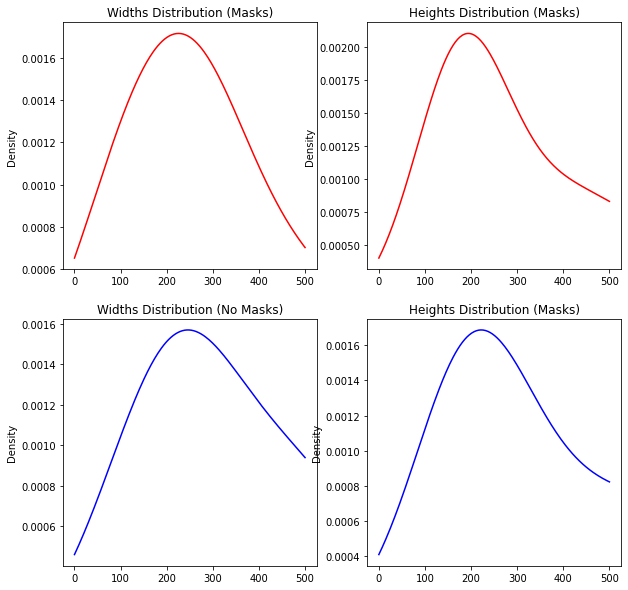

In [ ]:
# plot the distribution of height and width in each folder
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(10,10))

sns.distplot(dimensions1_width,
             hist = False,
             ax = axes[0,0],
             color='red',
             kde_kws={'clip': (0, 500)})
axes[0,0].set_title("Widths Distribution (Masks)")

sns.distplot(dimensions1_height,
             hist = False,
             ax = axes[0,1],
             color='red',
             kde_kws={'clip': (0, 500)})
axes[0,1].set_title("Heights Distribution (Masks)")

sns.distplot(dimensions2_width,
             hist = False,
             ax = axes[1,0],
             color='blue',
             kde_kws={'clip': (0, 500)})
axes[1,0].set_title("Widths Distribution (No Masks)")

sns.distplot(dimensions2_height,
             hist = False,
             ax = axes[1,1],
             color='blue',
             kde_kws={'clip': (0, 500)})
axes[1,1].set_title("Heights Distribution (Masks)")

plt.show()

To ensure that the images are not too blurred to be recognized, based on the plot above, 128 * 128 seems to be a decent minimal image size, therefore, we used it to filter out the images smaller than 128 * 128, this reduces 234 images in the Masks folder, and 92 images in the No Masks folder, which makes our dataset 1129 in Masks folder and 875 in No Masks folder. 2004 images in total.

In [ ]:
# find out pics that not fit 128*128
dimensions1_small = [item for item in dimensions1 if (item[0] < 128) | (item[1] < 128)]
print("Small Pics in Masks:", dimensions1_small)
print("No. of Small Pics in Masks:", len(dimensions1_small), "\n")
dimensions2_small = [item for item in dimensions2 if (item[0] < 128) | (item[1] < 128)]
print("Small Pics in No Masks:", dimensions2_small)
print("No. of Small Pics in No Masks:", len(dimensions2_small))

Small Pics in Masks: [(122, 167), (34, 125), (54, 156), (126, 167), (39, 142), (87, 75), (53, 68), (81, 75), (82, 167), (85, 343), (146, 113), (70, 150), (95, 122), (61, 77), (75, 167), (117, 167), (73, 86), (76, 88), (75, 88), (195, 116), (73, 88), (105, 189), (111, 270), (114, 167), (105, 143), (71, 98), (101, 369), (36, 167), (47, 101), (48, 65), (55, 72), (80, 167), (84, 119), (72, 336), (98, 178), (101, 150), (95, 147), (109, 126), (101, 189), (108, 174), (77, 126), (115, 213), (110, 167), (300, 122), (36, 43), (108, 409), (64, 167), (57, 130), (126, 88), (34, 53), (83, 182), (113, 130), (79, 180), (82, 112), (87, 91), (86, 182), (112, 102), (66, 151), (80, 75), (49, 65), (86, 91), (103, 157), (111, 191), (82, 115), (74, 194), (50, 79), (67, 155), (88, 79), (60, 176), (122, 441), (86, 127), (91, 167), (43, 111), (80, 194), (86, 138), (123, 254), (123, 441), (86, 92), (100, 98), (92, 181), (97, 441), (48, 74), (68, 102), (117, 167), (98, 157), (113, 182), (65, 168), (132, 89), (127

In [ ]:
# Remove small pics that are smaller than 128*128 from masks folder
import os
newdir1 = "/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/picssmallerthan128/"


for f in os.listdir(dir1):
  # original image path
  file_path = os.path.abspath(os.path.join(dir1, f)) 
  
  name, ext = os.path.splitext(f)

  img = Image.open(file_path)
  if img.size in dimensions1_small:
    # rename image path
     new_file_path=os.path.abspath(os.path.join(newdir1,f))  
     os.rename(file_path,new_file_path) 

# Count the number of pics remaining in masks folder
import os, os.path
print(len([name for name in os.listdir(dir1) if os.path.isfile(os.path.join(dir1, name))]))

1129


In [ ]:
# Remove small pics that are smaller than 128*128 from no masks folder
import os
newdir2 = "/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/picssmallerthan128/"


for f in os.listdir(dir2):
  # original image path
  file_path = os.path.abspath(os.path.join(dir2, f)) 
  
  name, ext = os.path.splitext(f)

  img = Image.open(file_path)
  if img.size in dimensions2_small:
    # rename image path
     new_file_path=os.path.abspath(os.path.join(newdir2,f))  
     os.rename(file_path,new_file_path) 

# Count the number of pics remaining in masks folder
import os, os.path
print(len([name for name in os.listdir(dir2) if os.path.isfile(os.path.join(dir2, name))]))

875


# Modeling Preparation

- resize the images to 550 * 550 with padding and keeping the aspects ratio
- partition the data into 60% train and 40% test
- read the train and test data into the generators

## Resize the pictures to 550 * 550 according to the avg height and avg width

- to avoid image distortion, we 
  - resized the images with padding 
  - kept the aspects ratio

In [ ]:
# Masks folder
import numpy as np
print("No. of Images in Masks Folder:\n", len(dimensions1))


print("Avg Img Width in Masks Folder:\n", np.mean(dimensions1_width))

print("Avg Img Height in Masks Folder:\n", np.mean(dimensions1_height))



# No Masks folder
print("No. of Images in No Masks Folder:\n", len(dimensions2))


print("Avg Img Width in No Masks Folder:\n", np.mean(dimensions2_width))

print("Avg Img Height in No Masks Folder:\n", np.mean(dimensions2_height))

No. of Images in Masks Folder:
 1129
Avg Img Width in Masks Folder:
 541.3755535872453
Avg Img Height in Masks Folder:
 481.05934455270153
No. of Images in No Masks Folder:
 875
Avg Img Width in No Masks Folder:
 549.5828571428572
Avg Img Height in No Masks Folder:
 538.4697142857143


Based on the avg height and avg width in both folder, we resized the pictures into 550*550 with padding and keeps the aspect ratio

In [ ]:
from PIL import Image, ImageOps

In [ ]:
desired_size=550

# Masks folder
resized_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/resized_masks/'

for i in os.listdir(dir1):
  im_path=os.path.abspath(os.path.join(dir1, i))
  im=Image.open(im_path)

  old_size=im.size 
  ratio=float(desired_size)/max(old_size)
  new_size=tuple([int(x*ratio) for x in old_size])

  im=im.resize(new_size,Image.ANTIALIAS)

  # create a new image and paste the resized image on it
  new_im=Image.new('RGB',(desired_size,desired_size))
  new_im.paste(im,((desired_size-new_size[0])//2,
                   (desired_size-new_size[1])//2))
  
  new_im_path=os.path.abspath(os.path.join(resized_path,i))
  new_im.save(new_im_path)

In [ ]:
desired_size=550

# No Masks folder
resized_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/resized_no masks'

for i in os.listdir(dir2):
  im_path=os.path.abspath(os.path.join(dir2, i))
  im=Image.open(im_path)

  old_size=im.size 
  ratio=float(desired_size)/max(old_size)
  new_size=tuple([int(x*ratio) for x in old_size])

  im=im.resize(new_size,Image.ANTIALIAS)

  # create a new image and paste the resized image on it
  new_im=Image.new('RGB',(desired_size,desired_size))
  new_im.paste(im,((desired_size-new_size[0])//2,
                   (desired_size-new_size[1])//2))
  
  new_im_path=os.path.abspath(os.path.join(resized_path,i))
  new_im.save(new_im_path)

## Mix all resized images from both folders into one folder

In [ ]:
import shutil
import os
import glob

resized_masks_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/resized_masks'
all_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/all/'

# copy images from "resized_masks" folder to "all folder"
for i in glob.iglob(os.path.join(resized_masks_path,'*jpg')):
  shutil.copy(i,all_path)

In [ ]:
# copy images from "resized_no_masks" folder to "all" folder
resized_no_masks_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/resized_no masks'

for i in glob.iglob(os.path.join(resized_no_masks_path,'*jpg')):
  shutil.copy(i,all_path)

In [ ]:
# check if all images are copied in
len(os.listdir(all_path))

2004

## Partition the data into 60% training (1203 images), 40% test (801 images), using random selection

In [ ]:
import os
import shutil
import glob
import random

train=random.sample(glob.glob('/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/all/*.jpg'),1203)
len(train)

# see a few samples 
train[1:5]

['/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/all/nomasks596.jpg',
 '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/all/masks1066.jpg',
 '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/all/nomasks286.jpg',
 '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/images_done/binary/all/nomasks844.jpg']

In [ ]:
train_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/train'
for i in train:
  shutil.move(i,train_path)

In [ ]:
# check if all moved in
len(os.listdir(train_path))

1203

In [ ]:
test_path='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/test'

for i in glob.iglob(os.path.join(all_path,'*jpg')):
  shutil.move(i,test_path)

In [ ]:
# check if all moved in
len(os.listdir(test_path))

801

### caulculate the number of masks vs no masks in both train and test folders for future reference

In [ ]:
# train set
count_nomasks=0
for i in os.listdir(train_path):
  count_nomasks=count_nomasks+str(i).count('no')

print('No. of no masks: ', count_nomasks)
print('No. of with masks: ', 1203-count_nomasks)


No. of no masks:  523
No. of with masks:  680


In [ ]:
# test set
count_nomasks=0
for i in os.listdir(test_path):
  count_nomasks=count_nomasks+str(i).count('no')

print('No. of no masks: ', count_nomasks)
print('No. of with masks: ', 801-count_nomasks)


No. of no masks:  352
No. of with masks:  449


### separate the nomasks and masks images into 2 folders in both train and test sets

In [ ]:
# train set
with_mask='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/train/with_mask'
without_mask='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/train/without_mask'

for i in glob.iglob(os.path.join(train_path,'*jpg')):
  if 'nomasks' in str(i):
    shutil.move(i,without_mask)
  else:
    shutil.move(i,with_mask)

In [ ]:
# check if all moved in
print(len(os.listdir(with_mask)))
print(len(os.listdir(without_mask)))

680
523


In [ ]:
# test set
with_mask='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/test/with_mask'
without_mask='/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/test/without_mask'

for i in glob.iglob(os.path.join(test_path,'*jpg')):
  if 'nomasks' in str(i):
    shutil.move(i,without_mask)
  else:
    shutil.move(i,with_mask)

In [ ]:
# check if all moved in
print(len(os.listdir(with_mask)))
print(len(os.listdir(without_mask)))

449
352


## Read in the train vs test images and generate labels for them

- note: used the datasize of 550 * 550

---



In [ ]:
train_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/train'
test_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # keep the original size of 550*550
        target_size=(550, 550),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=20,
        class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [ ]:
# take a look at the shape of data batch and labels batch in the train set
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 550, 550, 3)
labels batch shape: (20,)


# Models

## A Random Baseline Model

- 66.42% val_accuracy for the best scenario

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(550, 550, 3))) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 548, 548, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 274, 274, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 272, 272, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 136, 136, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 134, 134, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 67, 67, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 65, 65, 128)       1

In [ ]:
# compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

### Baseline Model -- scenario 1
- heavily overfitting on the training set -- needs to solve the overfitting problem

In [ ]:
# fit the model--1
import time

start = time.time()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=60, # 1203/20=61
      epochs=10,
      validation_data=test_generator,
      validation_steps=40)  # 801/20=41
                           
end = time.time()
print(end - start)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
60/60 [==============================] - 1068s 18s/step - loss: 0.9566 - acc: 0.5672 - val_loss: 0.6835 - val_acc: 0.5575
Epoch 2/10
60/60 [==============================] - 855s 14s/step - loss: 0.6760 - acc: 0.5985 - val_loss: 0.6856 - val_acc: 0.5550
Epoch 3/10
60/60 [==============================] - 852s 14s/step - loss: 0.6610 - acc: 0.6289 - val_loss: 0.6921 - val_acc: 0.5375
Epoch 4/10
60/60 [==============================] - 852s 14s/step - loss: 0.6373 - acc: 0.6407 - val_loss: 0.6874 - val_acc: 0.5713
Epoch 5/10
60/60 [==============================] - 860s 14s/step - loss: 0.5739 - acc: 0.6991 - val_loss: 0.7216 - val_acc: 0.5475
Epoch 6/10
60/60 [==============================] - 855s 14s/step - loss: 0.4767 - acc: 0.7675 - val_loss: 0.8230 - val_acc: 0.6025
Epoch 7/10
60/60 [==============================] - 851s 14s/step - loss: 0.3197 - acc: 0.8690 - val_loss: 0.8399 - val_acc: 0.6225

In [ ]:
# Save the model
model.save('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario1.h5')

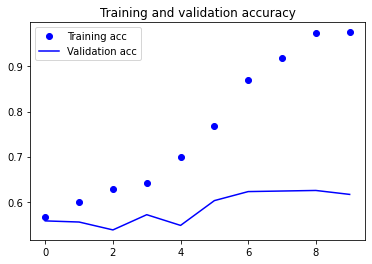

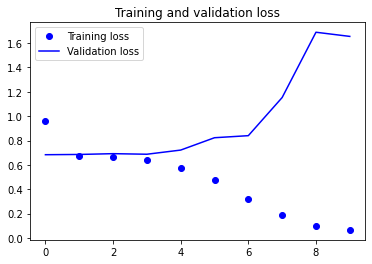

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Baseline Model -- scenario 2
  - increase the epochs to 30, and set an early stopping (patience=5), to see within these 100 epochs, what's the best val_accuracy the model could achieve.
  - still heavily overfitting on the train set
  - val_accuracy slightly improved to 66.42%, at the 4th *epoch*

In [ ]:
# fit the model--2
import time
from keras.callbacks import EarlyStopping

start = time.time()


es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=5, 
                   verbose=1,
                   restore_best_weights=True)


history = model.fit_generator(
      train_generator,
      steps_per_epoch=61, # 1203/20=61
      epochs=30,
      callbacks=[es],
      verbose=1,
      validation_data=test_generator,
      validation_steps=41)  # 801/20=41
                           
end = time.time()
print(end - start)

Epoch 1/30
61/61 [==============================] - 863s 14s/step - loss: 0.0297 - acc: 0.9925 - val_loss: 2.3361 - val_acc: 0.6342
Epoch 2/30
61/61 [==============================] - 866s 14s/step - loss: 0.0294 - acc: 0.9925 - val_loss: 1.9383 - val_acc: 0.6367
Epoch 3/30
61/61 [==============================] - 865s 14s/step - loss: 0.0080 - acc: 0.9983 - val_loss: 2.4311 - val_acc: 0.6317
Epoch 4/30
61/61 [==============================] - 867s 14s/step - loss: 0.0117 - acc: 0.9992 - val_loss: 2.2544 - val_acc: 0.6642
Epoch 5/30
61/61 [==============================] - 865s 14s/step - loss: 0.0027 - acc: 0.9992 - val_loss: 2.5550 - val_acc: 0.6579
Epoch 6/30
61/61 [==============================] - 861s 14s/step - loss: 0.0042 - acc: 0.9992 - val_loss: 2.5690 - val_acc: 0.6542
Epoch 7/30
61/61 [==============================] - 863s 14s/step - loss: 0.0016 - acc: 0.9992 - val_loss: 2.6014 - val_acc: 0.6479
Epoch 8/30
61/61 [==============================] - 862s 14s/step - loss: 0.

In [ ]:
# Save the model
model.save('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario2.h5')

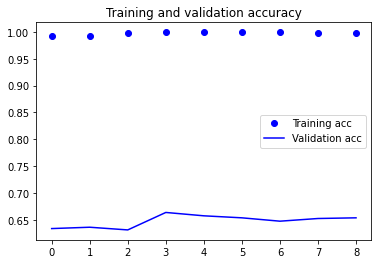

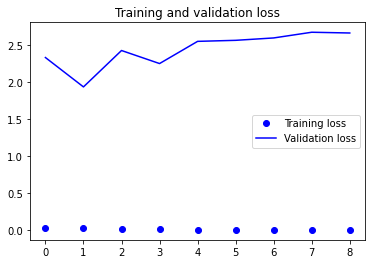

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Baseline Model -- scenario 3
  - increase the epochs to 100, and set an early stopping (patience=10), to see within these 100 epochs, what's the best val_accuracy the model could achieve.
  - still heavily overfitting on the train set
  - val_accuracy 65.17%

In [ ]:
# fit the model--3
import time
from keras.callbacks import EarlyStopping

start = time.time()


es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)


history = model.fit_generator(
      train_generator,
      steps_per_epoch=61, # 1203/20=61
      epochs=100,
      callbacks=[es],
      verbose=1,
      validation_data=test_generator,
      validation_steps=41)  # 801/20=41
                           
end = time.time()
print(end - start)

Epoch 1/100
61/61 [==============================] - 594s 10s/step - loss: 0.6813 - acc: 0.5711 - val_loss: 0.6940 - val_acc: 0.5531
Epoch 2/100
61/61 [==============================] - 24s 391ms/step - loss: 0.6656 - acc: 0.6118 - val_loss: 0.7201 - val_acc: 0.5680
Epoch 3/100
61/61 [==============================] - 24s 389ms/step - loss: 0.6370 - acc: 0.6268 - val_loss: 0.6634 - val_acc: 0.5930
Epoch 4/100
61/61 [==============================] - 23s 384ms/step - loss: 0.5978 - acc: 0.6808 - val_loss: 0.7819 - val_acc: 0.5630
Epoch 5/100
61/61 [==============================] - 24s 386ms/step - loss: 0.5440 - acc: 0.7357 - val_loss: 0.7114 - val_acc: 0.6280
Epoch 6/100
61/61 [==============================] - 23s 383ms/step - loss: 0.4504 - acc: 0.7980 - val_loss: 0.7848 - val_acc: 0.6267
Epoch 7/100
61/61 [==============================] - 24s 387ms/step - loss: 0.3509 - acc: 0.8504 - val_loss: 0.9295 - val_acc: 0.6155
Epoch 8/100
61/61 [==============================] - 23s 384ms/

In [ ]:
# Save the model
model.save('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario3.h5')

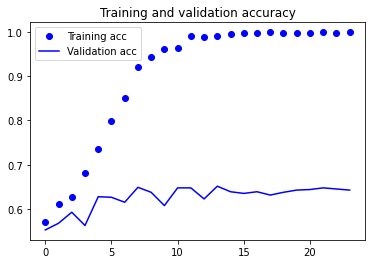

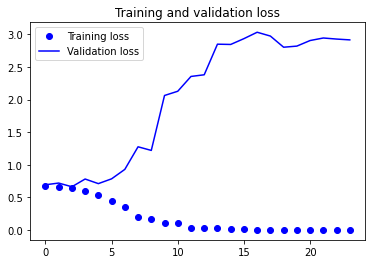

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 2 - Feature Extraction Using VGG19

- 80% val_accuracy


In [ ]:
from keras.applications import VGG19

# apply vgg19 to dataset
conv_base=VGG19(weights='imagenet',
                include_top=False,
                input_shape=(550,550,3))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 550, 550, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 550, 550, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 550, 550, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 275, 275, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 275, 275, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 275, 275, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 137, 137, 128)     0     

feature extraction

In [ ]:
import numpy as np

# let's time it
from datetime import datetime
startTime = datetime.now()

# initialize your generator
datagen = ImageDataGenerator(rescale=1./255) # just rescale the data, didn't apply data augmentation
batch_size = 20

def extract_features(directory, sample_count):
    # create an empty array for each sample/feature that extracted out
    # we'll ultimately make 512 arrays, each of them is 17*17
    features = np.zeros(shape=(sample_count, 17, 17, 512)) # this is given from the VGG17 architecture
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(550, 550),
        batch_size=batch_size,
        class_mode='binary')
    i = 0

    # this step is to pull in the images and drop them through the conv_base
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)

        # identify which features/filters are included in each features_batch
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        # identify the labels included in each labels_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch

        i += 1

        # if all pics have already been extracted, stop the loop. 
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels


# apply the function defined above
train_features, train_labels = extract_features(train_dir, 1203) 
print(datetime.now() - startTime)
test_features, test_labels = extract_features(test_dir, 801)
print(datetime.now() - startTime)

Found 1203 images belonging to 2 classes.
0:08:14.002506
Found 801 images belonging to 2 classes.
0:13:24.667328


In [ ]:
# reshape the extracted features
train_features=np.reshape(train_features,(1203,17*17*512))
test_features=np.reshape(test_features,(801,17*17*512))

In [ ]:
# save the extracted features as npz files
np.savez('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/train_features.npz',train_features)
np.savez('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/test_features.npz',test_features)

fit the extracted features into DNN model

In [ ]:
from keras import models, layers, optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=17 * 17 * 512))# input dim should fit the shape of the extracted features
model.add(layers.Dropout(0.5))# dropout layer to avoid model converge too quickly, and make sure that the model try as many possible combinations as possible
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               37880064  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import EarlyStopping

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=30, 
                   verbose=1,
                   restore_best_weights=True)

history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    callbacks=[es],
                    verbose=1,
                    validation_data=(test_features, test_labels))

Epoch 1/100
61/61 [==============================] - 3s 47ms/step - loss: 0.7566 - acc: 0.5179 - val_loss: 0.6810 - val_acc: 0.5605
Epoch 2/100
61/61 [==============================] - 3s 42ms/step - loss: 0.7120 - acc: 0.5428 - val_loss: 0.6699 - val_acc: 0.5618
Epoch 3/100
61/61 [==============================] - 3s 41ms/step - loss: 0.7029 - acc: 0.5453 - val_loss: 0.6750 - val_acc: 0.5605
Epoch 4/100
61/61 [==============================] - 3s 43ms/step - loss: 0.6755 - acc: 0.5877 - val_loss: 0.6470 - val_acc: 0.6504
Epoch 5/100
61/61 [==============================] - 2s 41ms/step - loss: 0.6712 - acc: 0.5794 - val_loss: 0.6487 - val_acc: 0.6217
Epoch 6/100
61/61 [==============================] - 2s 41ms/step - loss: 0.6546 - acc: 0.6068 - val_loss: 0.6355 - val_acc: 0.6342
Epoch 7/100
61/61 [==============================] - 3s 42ms/step - loss: 0.6520 - acc: 0.6043 - val_loss: 0.6306 - val_acc: 0.6529
Epoch 8/100
61/61 [==============================] - 3s 42ms/step - loss: 0.

In [ ]:
# Save the model
model.save('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model2_using_vgg19.h5')

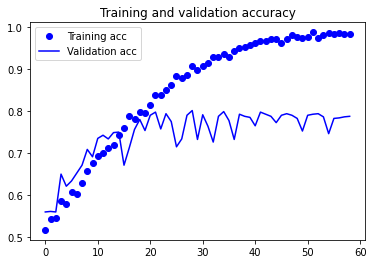

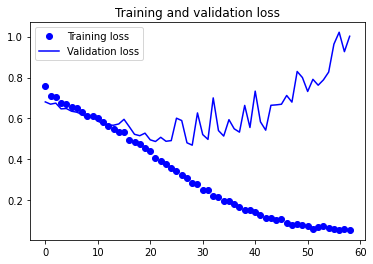

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 3 - Data Augmentation Using VGG19

- put VGG19 as a part of the model, and remain all other parameters unchanged.
- 80.27% val_accuracy

In [ ]:
from keras.applications import VGG19

# apply vgg19 to dataset
conv_base=VGG19(weights='imagenet',
                include_top=False,
                input_shape=(550,550,3))

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))# dropout layer to avoid model converge too quickly, and make sure that the model try as many possible combinations as possible
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 17, 17, 512)       20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 147968)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               37880064  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [ ]:
# freeze the conv_base!!!!!
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(550, 550),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=30, 
                   verbose=1,
                   restore_best_weights=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=61,# 1203/20=61
      epochs=100,
      callbacks=[es], 
      validation_data=test_generator,
      validation_steps=41,# 801/20=41
      verbose=1)

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.
Epoch 1/100
61/61 [==============================] - 782s 13s/step - loss: 0.7583 - acc: 0.5237 - val_loss: 0.6839 - val_acc: 0.5605
Epoch 2/100
61/61 [==============================] - 127s 2s/step - loss: 0.7162 - acc: 0.5320 - val_loss: 0.6847 - val_acc: 0.5618
Epoch 3/100
61/61 [==============================] - 127s 2s/step - loss: 0.7126 - acc: 0.5278 - val_loss: 0.6873 - val_acc: 0.5605
Epoch 4/100
61/61 [==============================] - 126s 2s/step - loss: 0.7092 - acc: 0.5320 - val_loss: 0.6871 - val_acc: 0.5605
Epoch 5/100
61/61 [==============================] - 124s 2s/step - loss: 0.6971 - acc: 0.5378 - val_loss: 0.6840 - val_acc: 0.5605
Epoch 6/100
61/61 [==============================] - 123s 2s/step - loss: 0.6942 - acc: 0.5378 - val_loss: 0.6847 - val_acc: 0.5605
Epoch 7/100
61/61 [==============================] - 123s 2s/step - loss: 0.6984 - acc: 0.5403 - val_loss: 0.6787 - val_acc:

In [ ]:
# Save the model
model.save('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model3_vgg19_nested_in_model.h5')

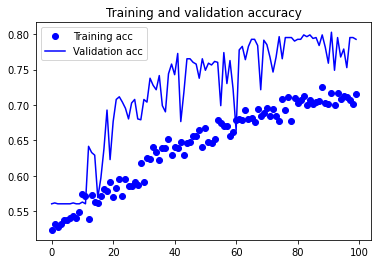

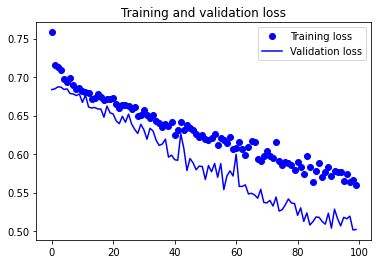

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 4 -- Fine Tuning using VGG19
- unfreeze the last three layers of VGG19
- all other layers remain the same as model 3
- val_accuracy 88.76%, at the 37th epoch

In [ ]:
from keras.applications import VGG19

# apply vgg19 to dataset
conv_base=VGG19(weights='imagenet',
                include_top=False,
                input_shape=(550,550,3))

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 550, 550, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 550, 550, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 550, 550, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 275, 275, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 275, 275, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 275, 275, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 137, 137, 128)     0     

In [ ]:
# unfreeze the 4 layers in conv_base counting from the end
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))# dropout layer to avoid model converge too quickly, and make sure that the model try as many possible combinations as possible
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 17, 17, 512)       20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 147968)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               37880064  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)               

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(550, 550),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=30, 
                   verbose=1,
                   restore_best_weights=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=61,# 1203/20=61
      epochs=100,
      callbacks=[es], 
      validation_data=test_generator,
      validation_steps=41,# 801/20=41
      verbose=1)

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.
Epoch 1/100
61/61 [==============================] - 127s 2s/step - loss: 0.7245 - acc: 0.5096 - val_loss: 0.6777 - val_acc: 0.5605
Epoch 2/100
61/61 [==============================] - 126s 2s/step - loss: 0.7016 - acc: 0.5145 - val_loss: 0.6842 - val_acc: 0.5605
Epoch 3/100
61/61 [==============================] - 124s 2s/step - loss: 0.6894 - acc: 0.5495 - val_loss: 0.6594 - val_acc: 0.5755
Epoch 4/100
61/61 [==============================] - 124s 2s/step - loss: 0.6348 - acc: 0.6426 - val_loss: 0.5696 - val_acc: 0.7129
Epoch 5/100
61/61 [==============================] - 124s 2s/step - loss: 0.5905 - acc: 0.6874 - val_loss: 0.4587 - val_acc: 0.8002
Epoch 6/100
61/61 [==============================] - 124s 2s/step - loss: 0.5392 - acc: 0.7440 - val_loss: 0.4459 - val_acc: 0.7990
Epoch 7/100
61/61 [==============================] - 123s 2s/step - loss: 0.4905 - acc: 0.7772 - val_loss: 0.5214 - val_acc: 

In [ ]:
# Save the model
model.save('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model4_vgg19_fine_tuning.h5')

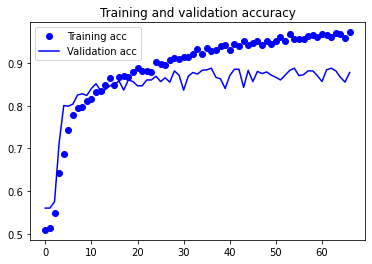

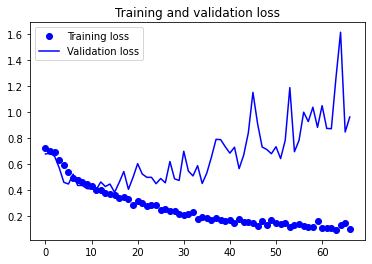

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Results and Discussion
- For code for ploting loss curve and accuracy curve, please refer to the respective block in the Models *Part*

### Accuracy and Loss Curves

- In total, we built 6 models, including a baseline model (including 3 scenarios), a model applying AGG19 for feature extraction (model 2), a model nesting freezed AGG19 in a customized DNN for data augmentation (model 3), and a model fine tuning the last 4 layers of the VGG19 (model 3).

- As shown in the curves below, all of the 3 baseline models are heavily overfitting on the training set. Among them, the second senario has the best accuracy rate in the validation set, which reaches 66.42%.

- As shown in the curves for model 2, by applying VGG19 for feature extraction, the accuracy in the validation set is significantly enhanced to 80.15%. Although the model still overfits on the training set, the overfitting issue is not as serious as in the baseline models.

- In model 3, for data augmentation, we nested the VGG19 into the same customized DNN as we applied in model 2. The accuracy in the validation set is slightly imporved from 80.15% to 80.27%, while the model starts to overfit on the validation set.

- In model 4, we remained the same model structure as model 3, but fine tuned the last 4 layers of the VGG19. This on the one hand, significantly improves the accuracy in the validation set to 88.76% (at the 37th epoch), while on the other hand, solves the overfitting problem. The accuracies in both sets are close to each other.



Baseline Model- scenario 1

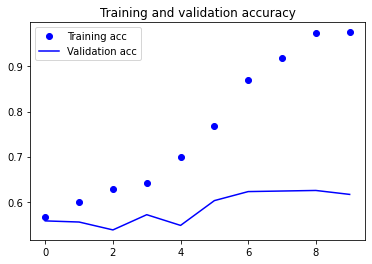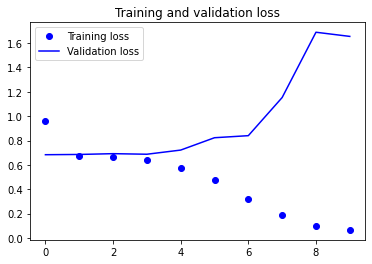

In [ ]:
from keras.models import load_model
baseline1=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario1.h5')

test_loss, test_acc = baseline1.evaluate(test_generator)
print('test acc:', test_acc)

41/41 [==============================] - 338s 8s/step - loss: 1.6542 - acc: 0.6155
test acc: 0.6154806613922119


Baseline Model - scenario 2

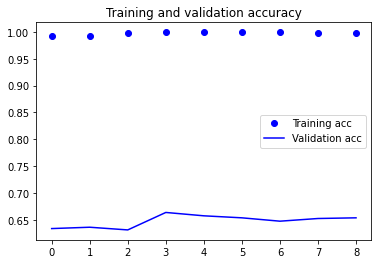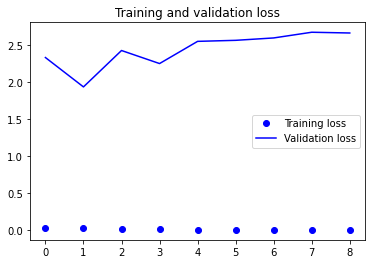

In [ ]:
from keras.models import load_model
baseline2=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario2.h5')

test_loss, test_acc = baseline2.evaluate_generator(test_generator)
print('test acc:', test_acc)

test acc: 0.6641697883605957


Baseline Model - scenario 3

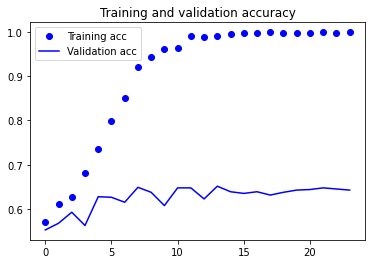
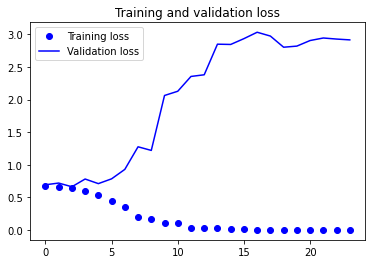

In [ ]:
from keras.models import load_model
baseline3=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario3.h5')

test_loss, test_acc = baseline3.evaluate_generator(test_generator)
print('test acc:', test_acc)

test acc: 0.6516854166984558


Model 2 - Feature Extraction Using VGG19

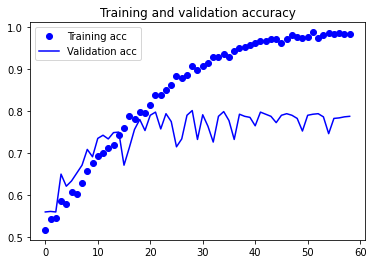
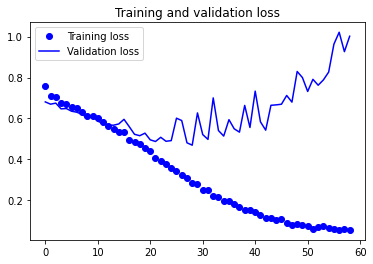

In [ ]:
from keras.models import load_model
model2=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model2_using_vgg19.h5')

import numpy as np
testfeatures=np.load('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/test_features.npz')

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_model2 = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=801,
        class_mode='binary')

images,labels=test_generator_model2.next()

test_loss, test_acc = model2.evaluate(testfeatures['arr_0'],labels,batch_size=20,steps=41)
print('test acc:', test_acc)

Found 801 images belonging to 2 classes.
41/41 [==============================] - 0s 10ms/step - loss: 1.0841 - acc: 0.5069
test acc: 0.5068663954734802


Model 3 - Data Augmentation Using VGG19



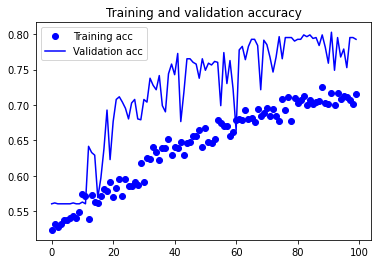
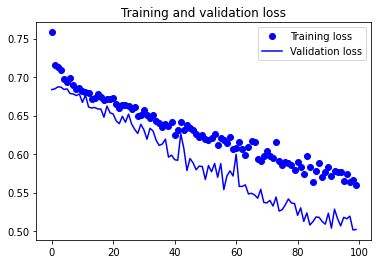

In [ ]:
from keras.models import load_model
model3=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model3_vgg19_nested_in_model.h5')

test_loss, test_acc = model3.evaluate_generator(test_generator)
print('test acc:', test_acc)

test acc: 0.7927590608596802


Model 4 - Fine Tuning using VGG19

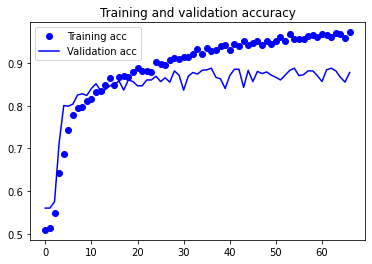
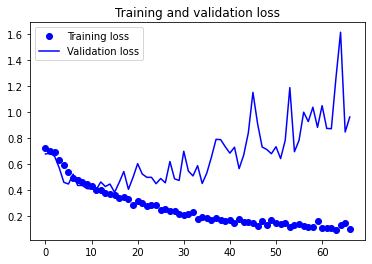

In [ ]:
from keras.models import load_model
model4=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model4_vgg19_fine_tuning.h5')

test_loss, test_acc = model4.evaluate_generator(test_generator)
print('test acc:', test_acc)

test acc: 0.8876404762268066


### Confusion Matrix

- for detailed classification report for each model, please refer to the respective blocks below


**Confusion Metrix summary**

- As shown below, among the 6 models, Model 4 performs the best in the test set in terms of both correctly identifying those who wear masks, and correctly identifying those who don't wear masks. 
- At the same time, Model 4 also has the highest f1 score in the test set, indicating the best balance between precision and recall.
- In General, the Type II error (FN) is a common issue for all of the 6 models. In other words, compared to falsely identifying those who didn't wear masks as wearing masks, all models are more likely to misclassifying those who wears unusual masks as not wearing masks. Based on this, 
  - for individuals entering a building with mask detection cameras, it is not a good choice to wear some tricky masks, such as masks with human face printed on it, masks covering the mouth with transparent materials, etc. Even though those masks satisfy the virus prevention requirements, and are properly worn, they will cause you unnecssary problems in entering the buildings during the COVID period.
  - in terms of improving the performance of the model, more training should be applied to the aspects of distinguishing tricky masks from bare faces, especially faces with tatoos, paintings and heavy makeups. 


In [ ]:
matrix=[[668,12,10,513],
        [287,162,146,206],
        [679,1,0,523],
        [318,131,138,214],
        [680,0,4,519],
        [339,110,169,183],
        [395,285,303,220],
        [266,183,222,130],
        [578,102,131,392],
        [374,75,91,261],
        [677,3,31,492],
        [422,27,63,289]]

import pandas as pd
matrix=pd.DataFrame(matrix)

models=['baseline1_train','baseline1_test',
        'baseline2_train','baseline2_test',
        'baseline3_train','baseline3_test',
        'model2_train','model2_test',
        'model3_train','model3_test',
        'model4_train','model4_test']

columns=['TP','FP','FN','TN']

matrix.columns=columns

matrix['Models']=models

matrix['precision of 1']=matrix['TP']/(matrix['TP']+matrix['FP'])
matrix['recall']=matrix['TP']/(matrix['TP']+matrix['FN'])
matrix['f1 score']=1/(0.5*(1/matrix['precision of 1'])+0.5*(1/matrix['recall']))

matrix.head(12)

,TP,FP,FN,TN,Models,precision of 1,recall,f1 score
0,668,12,10,513,baseline1_train,0.982353,0.985251,0.983800
1,287,162,146,206,baseline1_test,0.639198,0.662818,0.650794
2,679,1,0,523,baseline2_train,0.998529,1.000000,0.999264
3,318,131,138,214,baseline2_test,0.708241,0.697368,0.702762
4,680,0,4,519,baseline3_train,1.000000,0.994152,0.997067
5,339,110,169,183,baseline3_test,0.755011,0.667323,0.708464
6,395,285,303,220,model2_train,0.580882,0.565903,0.573295
7,266,183,222,130,model2_test,0.592428,0.545082,0.567769
8,578,102,131,392,model3_train,0.850000,0.815233,0.832253
9,374,75,91,261,model3_test,0.832962,0.804301,0.818381


#### Baseline Model - scenario 1

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

baseline1=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario1.h5')


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # keep the original size of 550*550
        target_size=(550, 550),
        batch_size=1203,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=801,
        class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [ ]:
train_batch,train_labels=train_generator.next()
test_batch,test_labels=test_generator.next()

In [ ]:
# train set

train_preds = baseline1.predict(train_batch)

In [ ]:
len(train_preds)

1203

In [ ]:
train_preds

array([[1.4161525e-03],
       [9.9812680e-01],
       [1.2377503e-06],
       ...,
       [9.9999857e-01],
       [9.9999893e-01],
       [3.4746376e-03]], dtype=float32)

In [ ]:
import numpy as np
train_preds=np.round(train_preds)

In [ ]:
train_preds

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
cm=confusion_matrix(train_labels,train_preds)

In [ ]:
print('baseline1 trainset confusion_matrix:')
print(cm)

baseline1 trainset confusion_matrix:
[[668  12]
 [ 10 513]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels,train_preds))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       680
         1.0       0.98      0.98      0.98       523

    accuracy                           0.98      1203
   macro avg       0.98      0.98      0.98      1203
weighted avg       0.98      0.98      0.98      1203



In [ ]:
# test set

test_preds = baseline1.predict(test_batch)

In [ ]:
len(test_preds)

801

In [ ]:
test_preds

array([[5.42303622e-01],
       [9.08281982e-01],
       [3.81888598e-01],
       [9.95477259e-01],
       [1.64014071e-01],
       [1.64694730e-02],
       [4.04784262e-01],
       [3.16398327e-05],
       [3.14902395e-01],
       [3.28115970e-01],
       [9.00301695e-01],
       [7.47151017e-01],
       [1.07460253e-01],
       [2.65760161e-03],
       [1.11934642e-05],
       [1.17122985e-01],
       [8.52667019e-02],
       [9.70112443e-01],
       [1.20801292e-01],
       [8.40149343e-01],
       [5.09898067e-02],
       [6.68497086e-01],
       [5.31772443e-04],
       [9.58683729e-01],
       [9.99960780e-01],
       [9.99424696e-01],
       [4.11311835e-01],
       [6.97038397e-02],
       [9.43453424e-03],
       [7.63082365e-03],
       [5.87635525e-02],
       [9.74239886e-01],
       [7.45339692e-01],
       [9.89614844e-01],
       [9.99273956e-01],
       [8.46059434e-03],
       [1.91306382e-01],
       [8.61135423e-01],
       [6.66283251e-09],
       [9.02208865e-01],


In [ ]:
import numpy as np
test_preds=np.round(test_preds)

In [ ]:
test_preds

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [ ]:
cm=confusion_matrix(test_labels,test_preds)

In [ ]:
print('baseline1 testset confusion_matrix:')
print(cm)

baseline1 testset confusion_matrix:
[[287 162]
 [146 206]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,test_preds))

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65       449
         1.0       0.56      0.59      0.57       352

    accuracy                           0.62       801
   macro avg       0.61      0.61      0.61       801
weighted avg       0.62      0.62      0.62       801



#### Baseline Model - scenario 2

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

baseline2=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario2.h5')


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # keep the original size of 550*550
        target_size=(550, 550),
        batch_size=1203,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=801,
        class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [ ]:
train_batch,train_labels=train_generator.next()
test_batch,test_labels=test_generator.next()

In [ ]:
# train set

train_preds = baseline2.predict(train_batch)

In [ ]:
len(train_preds)

1203

In [ ]:
train_preds

array([[9.9997604e-01],
       [2.8769340e-10],
       [9.9999189e-01],
       ...,
       [4.6068970e-13],
       [8.3323981e-04],
       [1.5598162e-04]], dtype=float32)

In [ ]:
import numpy as np
train_preds=np.round(train_preds)

In [ ]:
train_preds

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
cm=confusion_matrix(train_labels,train_preds)

In [ ]:
print('baseline2 trainset confusion_matrix:')
print(cm)

baseline2 trainset confusion_matrix:
[[679   1]
 [  0 523]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels,train_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       680
         1.0       1.00      1.00      1.00       523

    accuracy                           1.00      1203
   macro avg       1.00      1.00      1.00      1203
weighted avg       1.00      1.00      1.00      1203



In [ ]:
# test set

test_preds = baseline2.predict(test_batch)

In [ ]:
len(test_preds)

801

In [ ]:
test_preds

array([[1.80817340e-02],
       [6.53997064e-03],
       [9.84674573e-01],
       [9.99601662e-01],
       [2.04846397e-01],
       [1.99545339e-01],
       [1.44695188e-03],
       [9.20435309e-01],
       [2.29749188e-01],
       [1.26434127e-02],
       [1.06205069e-01],
       [9.99903321e-01],
       [3.26852858e-01],
       [6.87624735e-04],
       [1.83708370e-01],
       [4.07628790e-02],
       [6.51929677e-01],
       [3.22574750e-02],
       [9.99925137e-01],
       [9.74110126e-01],
       [8.58189247e-04],
       [6.47614617e-03],
       [9.08637106e-01],
       [1.32394372e-04],
       [4.36208779e-07],
       [4.21239056e-05],
       [5.56221344e-02],
       [1.83866974e-02],
       [9.55045402e-01],
       [6.69028699e-01],
       [1.09242544e-01],
       [9.98503804e-01],
       [7.55537115e-03],
       [9.68328893e-01],
       [5.52838802e-01],
       [9.99999762e-01],
       [4.03848803e-03],
       [3.16151798e-01],
       [5.50096780e-02],
       [1.43981466e-13],


In [ ]:
import numpy as np
test_preds=np.round(test_preds)

In [ ]:
test_preds

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [ ]:
cm=confusion_matrix(test_labels,test_preds)

In [ ]:
print('baseline2 testset confusion_matrix:')
print(cm)

baseline2 testset confusion_matrix:
[[318 131]
 [138 214]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,test_preds))

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70       449
         1.0       0.62      0.61      0.61       352

    accuracy                           0.66       801
   macro avg       0.66      0.66      0.66       801
weighted avg       0.66      0.66      0.66       801



#### Baseline Model - scenario 3

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

baseline3=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/base_model_scenario3.h5')


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # keep the original size of 550*550
        target_size=(550, 550),
        batch_size=1203,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=801,
        class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [ ]:
train_batch,train_labels=train_generator.next()
test_batch,test_labels=test_generator.next()

In [ ]:
# train set

train_preds = baseline3.predict(train_batch)

In [ ]:
len(train_preds)

1203

In [ ]:
train_preds

array([[9.9987960e-01],
       [1.1030692e-08],
       [9.9987948e-01],
       ...,
       [7.7184392e-10],
       [2.3562723e-06],
       [2.4125304e-04]], dtype=float32)

In [ ]:
import numpy as np
train_preds=np.round(train_preds)

In [ ]:
train_preds

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
cm=confusion_matrix(train_labels,train_preds)

In [ ]:
print('baseline3 trainset confusion_matrix:')
print(cm)

baseline3 trainset confusion_matrix:
[[680   0]
 [  4 519]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels,train_preds))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       680
         1.0       1.00      0.99      1.00       523

    accuracy                           1.00      1203
   macro avg       1.00      1.00      1.00      1203
weighted avg       1.00      1.00      1.00      1203



In [ ]:
# test set

test_preds = baseline3.predict(test_batch)

In [ ]:
len(test_preds)

801

In [ ]:
test_preds

array([[8.24981868e-01],
       [5.54698706e-01],
       [9.99258578e-01],
       [3.34235765e-02],
       [9.99884009e-01],
       [9.58816671e-09],
       [7.91885778e-02],
       [9.82790826e-09],
       [1.17146045e-01],
       [2.05298048e-03],
       [8.81766796e-01],
       [1.77110940e-01],
       [9.09949733e-08],
       [7.83577620e-04],
       [9.62929785e-01],
       [9.89048064e-01],
       [2.48797059e-01],
       [8.42040360e-01],
       [9.99999881e-01],
       [1.39723480e-01],
       [1.28534762e-02],
       [4.77892846e-01],
       [3.04106951e-01],
       [7.03469198e-07],
       [1.00000000e+00],
       [2.94627353e-05],
       [6.88397733e-04],
       [5.91125245e-05],
       [9.98352528e-01],
       [1.68261831e-05],
       [8.47884774e-01],
       [7.74687827e-01],
       [3.98062866e-06],
       [5.19748986e-01],
       [5.77703178e-01],
       [1.00000000e+00],
       [8.17176420e-04],
       [4.94218320e-02],
       [6.05212212e-01],
       [4.49394105e-10],


In [ ]:
import numpy as np
test_preds=np.round(test_preds)

In [ ]:
test_preds

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [ ]:
cm=confusion_matrix(test_labels,test_preds)

In [ ]:
print('baseline3 testset confusion_matrix:')
print(cm)

baseline3 testset confusion_matrix:
[[339 110]
 [169 183]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,test_preds))

              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       449
         1.0       0.62      0.52      0.57       352

    accuracy                           0.65       801
   macro avg       0.65      0.64      0.64       801
weighted avg       0.65      0.65      0.65       801



#### Model 2

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

model2=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model2_using_vgg19.h5')


In [ ]:
train_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/train'
test_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # keep the original size of 550*550
        target_size=(550, 550),
        batch_size=1203,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=801,
        class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [ ]:
train_batch,train_labels=train_generator.next()
test_batch,test_labels=test_generator.next()

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               37880064  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [ ]:
import numpy as np
trainfeatures=np.load('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/train_features.npz')
testfeatures=np.load('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/test_features.npz')

In [ ]:
trainfeatures['arr_0']

array([[0.0720821 , 0.        , 0.        , ..., 0.        , 0.90425861,
        0.        ],
       [0.22428575, 0.        , 0.        , ..., 0.        , 0.97738594,
        0.        ],
       [0.26728031, 0.        , 0.        , ..., 0.        , 0.7833361 ,
        0.        ],
       ...,
       [0.13445514, 0.        , 0.        , ..., 0.        , 0.75457001,
        0.        ],
       [0.21330285, 0.        , 0.        , ..., 0.        , 1.16400504,
        0.        ],
       [0.0084573 , 0.        , 0.        , ..., 0.        , 0.80335444,
        0.        ]])

In [ ]:
trainfeatures['arr_0'].shape

(1203, 147968)

In [ ]:
# train set

train_preds = model2.predict(trainfeatures['arr_0'])

In [ ]:
len(train_preds)

1203

In [ ]:
train_preds

array([[0.05212395],
       [0.21811582],
       [0.23576994],
       ...,
       [0.05692189],
       [0.05425756],
       [0.03083156]], dtype=float32)

In [ ]:
import numpy as np
train_preds=np.round(train_preds)

In [ ]:
train_preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
cm=confusion_matrix(train_labels,train_preds)

In [ ]:
print('Model2 trainset confusion_matrix:')
print(cm)

Model2 trainset confusion_matrix:
[[411 269]
 [287 236]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels,train_preds))

              precision    recall  f1-score   support

         0.0       0.59      0.60      0.60       680
         1.0       0.47      0.45      0.46       523

    accuracy                           0.54      1203
   macro avg       0.53      0.53      0.53      1203
weighted avg       0.54      0.54      0.54      1203



In [ ]:
# test set

test_preds = model2.predict(testfeatures['arr_0'])

In [ ]:
len(test_preds)

801

In [ ]:
import numpy as np
test_preds=np.round(test_preds)

In [ ]:
test_preds

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [ ]:
cm=confusion_matrix(test_labels,test_preds)

In [ ]:
print('Model2 testset confusion_matrix:')
print(cm)

Model2 testset confusion_matrix:
[[279 170]
 [209 143]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,test_preds))

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.60       449
         1.0       0.46      0.41      0.43       352

    accuracy                           0.53       801
   macro avg       0.51      0.51      0.51       801
weighted avg       0.52      0.53      0.52       801



#### Model 3

In [ ]:
train_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/train'
test_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/test'

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

model3=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model3_vgg19_nested_in_model.h5')


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # keep the original size of 550*550
        target_size=(550, 550),
        batch_size=1203,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=801,
        class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [ ]:
train_batch,train_labels=train_generator.next()
test_batch,test_labels=test_generator.next()

In [ ]:
# train set

train_preds = model3.predict(train_batch)

In [ ]:
len(train_preds)

1203

In [ ]:
train_preds

array([[0.30322376],
       [0.37774244],
       [0.6364357 ],
       ...,
       [0.33327314],
       [0.8454337 ],
       [0.35174102]], dtype=float32)

In [ ]:
import numpy as np
train_preds=np.round(train_preds)

In [ ]:
train_preds

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
cm=confusion_matrix(train_labels,train_preds)

In [ ]:
print('model3 trainset confusion_matrix:')
print(cm)

model3 trainset confusion_matrix:
[[578 102]
 [131 392]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels,train_preds))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       680
         1.0       0.79      0.75      0.77       523

    accuracy                           0.81      1203
   macro avg       0.80      0.80      0.80      1203
weighted avg       0.81      0.81      0.81      1203



In [ ]:
# test set

test_preds = model3.predict(test_batch)

In [ ]:
len(test_preds)

801

In [ ]:
test_preds

array([[0.41214114],
       [0.79264754],
       [0.4167223 ],
       [0.8152896 ],
       [0.09876107],
       [0.2312658 ],
       [0.5729887 ],
       [0.35756502],
       [0.13075508],
       [0.49071574],
       [0.62595195],
       [0.6880639 ],
       [0.68821025],
       [0.3261862 ],
       [0.44754618],
       [0.42506298],
       [0.4003038 ],
       [0.7921811 ],
       [0.13109991],
       [0.8679912 ],
       [0.2428962 ],
       [0.8696087 ],
       [0.8042345 ],
       [0.39994514],
       [0.21606942],
       [0.22137974],
       [0.4299554 ],
       [0.8614917 ],
       [0.33560896],
       [0.24055326],
       [0.42298576],
       [0.6397679 ],
       [0.6842612 ],
       [0.38969213],
       [0.3726093 ],
       [0.4264803 ],
       [0.80307627],
       [0.49035737],
       [0.39226907],
       [0.18369903],
       [0.86136   ],
       [0.40476903],
       [0.20397204],
       [0.23476337],
       [0.7420565 ],
       [0.18828934],
       [0.24801162],
       [0.760

In [ ]:
import numpy as np
test_preds=np.round(test_preds)

In [ ]:
test_preds

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

In [ ]:
cm=confusion_matrix(test_labels,test_preds)

In [ ]:
print('model3 testset confusion_matrix:')
print(cm)

model3 testset confusion_matrix:
[[374  75]
 [ 91 261]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,test_preds))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       449
         1.0       0.78      0.74      0.76       352

    accuracy                           0.79       801
   macro avg       0.79      0.79      0.79       801
weighted avg       0.79      0.79      0.79       801



#### Model 4

In [ ]:
train_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/train'
test_dir = '/content/drive/Shared drives/Deep Learning Group 5/Project #2/data/test'

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

model4=load_model('/content/drive/Shared drives/Deep Learning Group 5/Project #2/models saved/vgg19/model4_vgg19_fine_tuning.h5')


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # keep the original size of 550*550
        target_size=(550, 550),
        batch_size=1203,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(550, 550),
        batch_size=801,
        class_mode='binary')

Found 1203 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [ ]:
train_batch,train_labels=train_generator.next()
test_batch,test_labels=test_generator.next()

In [ ]:
# train set

train_preds = model4.predict(train_batch)

In [ ]:
len(train_preds)

1203

In [ ]:
train_preds

array([[9.99942899e-01],
       [5.64306451e-04],
       [1.00000000e+00],
       ...,
       [2.55486957e-05],
       [1.21700335e-02],
       [9.99977708e-01]], dtype=float32)

In [ ]:
import numpy as np
train_preds=np.round(train_preds)

In [ ]:
train_preds

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
cm=confusion_matrix(train_labels,train_preds)

In [ ]:
print('model4 trainset confusion_matrix:')
print(cm)

model4 trainset confusion_matrix:
[[677   3]
 [ 31 492]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels,train_preds))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       680
         1.0       0.99      0.94      0.97       523

    accuracy                           0.97      1203
   macro avg       0.98      0.97      0.97      1203
weighted avg       0.97      0.97      0.97      1203



In [ ]:
# test set

test_preds = model4.predict(test_batch)

In [ ]:
len(test_preds)

801

In [ ]:
test_preds

In [ ]:
import numpy as np
test_preds=np.round(test_preds)

In [ ]:
test_preds

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [ ]:
cm=confusion_matrix(test_labels,test_preds)

In [ ]:
print('model4 testset confusion_matrix:')
print(cm)

model4 testset confusion_matrix:
[[422  27]
 [ 63 289]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,test_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       449
         1.0       0.91      0.82      0.87       352

    accuracy                           0.89       801
   macro avg       0.89      0.88      0.88       801
weighted avg       0.89      0.89      0.89       801



### Misclassified Images in Model 4

We visualized all misclassified images in the test set. As shown below, our model was not doing well in the following cases:
* wearing tricky masks (type II error)
* most part of the face is covered something other than masks (type I error)
* wearing masks improperly (type II error)
* low resolution images (the majority is type II error)

Among all these misclassified cases, the major error type is type II error.

In [ ]:
test_preds.shape

(801, 1)

In [ ]:
test_preds

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [ ]:
preds=test_preds.tolist()

In [ ]:
from pandas.core.common import flatten
preds=list(flatten(preds))

In [ ]:
preds

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0

In [ ]:
labels=test_labels.tolist()

In [ ]:
labels

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0

In [ ]:
import pandas as pd
df=pd.DataFrame()
df['preds']=preds
df['labels']=labels

In [ ]:
df

,preds,labels
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
796,1.0,1.0
797,0.0,0.0
798,0.0,0.0
799,0.0,0.0


In [ ]:
df.info()

In [ ]:
df['indicator']=df['preds']+df['labels']

In [ ]:
df

,preds,labels,indicator
0,1.0,1.0,2.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
796,1.0,1.0,2.0
797,0.0,0.0,0.0
798,0.0,0.0,0.0
799,0.0,0.0,0.0


In [ ]:
# extract index for misclassified pictures
index=df[df['indicator']==1].index.tolist()

In [ ]:
len(index)

90

In [ ]:
index

[22,
 24,
 28,
 44,
 45,
 48,
 60,
 62,
 73,
 86,
 88,
 91,
 131,
 143,
 150,
 155,
 162,
 164,
 171,
 185,
 207,
 215,
 217,
 220,
 234,
 241,
 255,
 259,
 263,
 274,
 297,
 300,
 324,
 325,
 337,
 342,
 353,
 354,
 361,
 363,
 368,
 392,
 407,
 413,
 426,
 427,
 428,
 433,
 440,
 468,
 470,
 477,
 486,
 487,
 489,
 497,
 498,
 519,
 521,
 531,
 555,
 559,
 581,
 582,
 590,
 602,
 614,
 622,
 624,
 640,
 643,
 649,
 663,
 670,
 674,
 675,
 686,
 691,
 699,
 702,
 705,
 717,
 722,
 729,
 738,
 741,
 760,
 764,
 768,
 795]

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()


for i in index:
    image = test_batch[i]
    imshow(image)

Output hidden; open in https://colab.research.google.com to view.

# Conclusion

* In terms of accuracy in the validation set, Model 4 is the best among all 6 models, which reaches an accuracy of around 88%.

* In our case, by nesting the pre-trained VGG19 into the customized dense layers and applying fine tuning to the last 4 layers of VGG19, the validation accuracy is significantly imporved, from 62% to 88%. At the same time, the problem of overfiting on the training set is also properly solved through this method.

* In terms of other metrices including misclassification rate, precision of 1 prediction, and f1 score, Model 4 still performs the best among all of the 6 models. 

* In General, the Type II error (FN) is a common issue for all of the 6 models. In other words, compared to falsely identifying those who didn't wear masks as wearing masks, all models are more likely to misclassifying those who wears unusual masks as not wearing masks.

* For individuals entering a building equipped with mask detection cameras, it is not a good choice to wear some tricky masks, such as masks with human face printed on it, masks covering the mouth with transparent materials, etc. Even though those masks satisfy the virus prevention requirements, and are properly worn, they will cause you unnecssary problems in entering the buildings during the COVID period.